In [2]:
!pip install shap

  Obtaining dependency information for shap from https://files.pythonhosted.org/packages/e5/bb/dc75933de86e6076f58cf68325877be952a97a371c26b252013f1258a5a7/shap-0.47.2-cp311-cp311-win_amd64.whl.metadata
  Obtaining dependency information for slicer==0.0.8 from https://files.pythonhosted.org/packages/63/81/9ef641ff4e12cbcca30e54e72fb0951a2ba195d0cda0ba4100e532d929db/slicer-0.0.8-py3-none-any.whl.metadata
   ---------------------------------------- 0.0/544.4 kB ? eta -:--:--
   ---- ----------------------------------- 61.4/544.4 kB 1.1 MB/s eta 0:00:01
   -------------- ------------------------- 194.6/544.4 kB 2.4 MB/s eta 0:00:01
   ---------------------------------------  542.7/544.4 kB 3.8 MB/s eta 0:00:01
   ---------------------------------------- 544.4/544.4 kB 3.8 MB/s eta 0:00:00


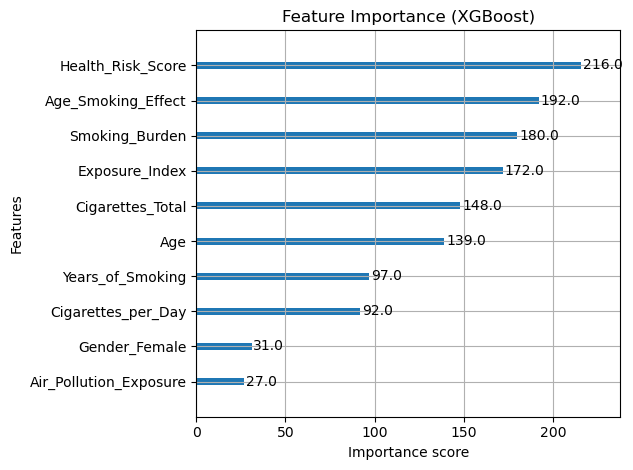

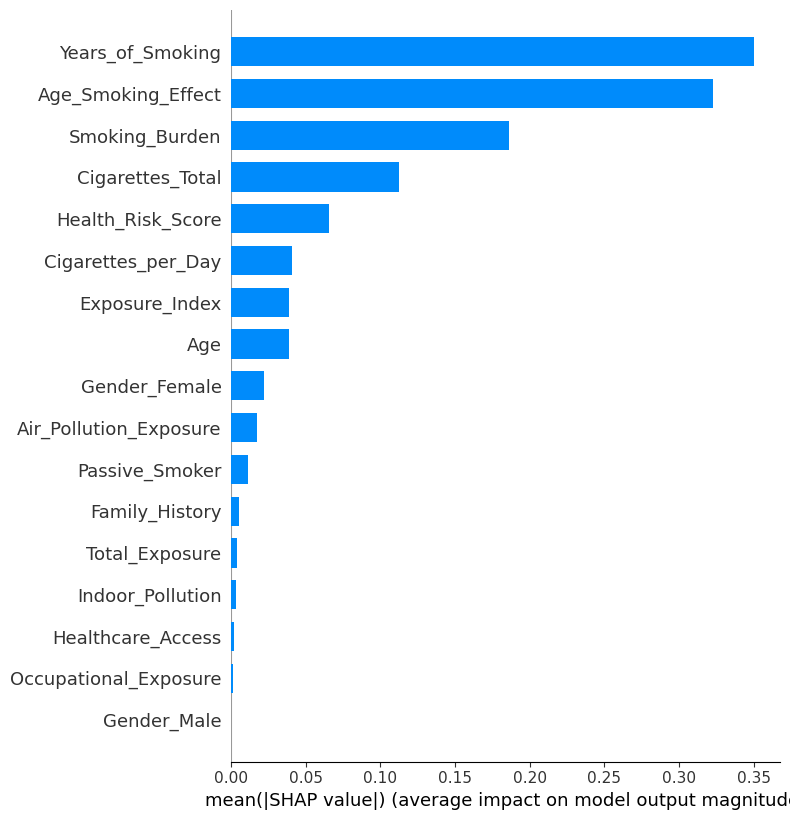

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import xgboost as xgb
from xgboost import plot_importance, plot_tree
import shap

df = pd.read_csv('learning_set.csv')
df.head()

# Zakładamy, że kolumna celu nazywa się:
target_column = 'Lung_Cancer_Diagnosis'

X = df.drop(columns=[target_column])
y = df[target_column]

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.3,
    stratify=y,        # zachowujemy proporcje klas!
    random_state=42
)

# Parametry po tuningu
params = {
    'colsample_bytree': 1.0, 'gamma': 0, 'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 200, 'scale_pos_weight': 20, 'subsample': 1.0
}

model = xgb.XGBClassifier(**params)
model.fit(X_train, y_train)

# Ważność cech
plot_importance(model, max_num_features=10)
plt.title("Feature Importance (XGBoost)")
plt.tight_layout()
plt.show()

# SHAP
explainer = shap.Explainer(model)
shap_values = explainer(X_train)

shap.summary_plot(shap_values, X_train, plot_type="bar")
